In [2]:
import sys
sys.path.append('../')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from xgboost import  XGBClassifier

from ml2rules.machinelearning import *
from ml2rules.rules import *

%load_ext autoreload
%autoreload 2

pd.set_option('display.max_columns', None)

SEED = 42

In [5]:
df = pd.read_csv('../data/epfl_data.csv')
print(f'Shape of the dataframe: {df.shape}')

target = 'Stability'
X = df.drop(target, axis=1)
y = df[target].map({'s': 1, 'ns': 0})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.99, random_state=SEED)

Shape of the dataframe: (200000, 259)


In [6]:
X_train.shape

(2000, 258)

In [7]:
# %load_ext autoreload
# %autoreload 2

m = XGBModel(X_train, X_test, y_train, y_test)
m.train(n_iter=25)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV 1/3; 1/25] START booster=gbtree, colsample_bytree=0.7222222222222222, gamma=0.3593813663804626, learning_rate=1.0, max_depth=5, min_child_weight=9, n_estimators=185, random_state=42, subsample=0.9444444444444444
[CV 2/3; 1/25] START booster=gbtree, colsample_bytree=0.7222222222222222, gamma=0.3593813663804626, learning_rate=1.0, max_depth=5, min_child_weight=9, n_estimators=185, random_state=42, subsample=0.9444444444444444
[CV 3/3; 1/25] START booster=gbtree, colsample_bytree=0.7222222222222222, gamma=0.3593813663804626, learning_rate=1.0, max_depth=5, min_child_weight=9, n_estimators=185, random_state=42, subsample=0.9444444444444444
[CV 2/3; 2/25] START booster=gbtree, colsample_bytree=0.6666666666666666, gamma=0.01, learning_rate=0.004641588833612777, max_depth=16, min_child_weight=6, n_estimators=95, random_state=42, subsample=0.6111111111111112
[CV 1/3; 2/25] START booster=gbtree, colsample_bytree=0.6666666666666666

In [33]:
y_hat = m.model.predict(X_train)
tree_surr = train_tree_classifier(X_train, y_hat)

In [36]:
c = MyClass(tree_clf=tree_surr, df=df, target='Stability')
c.get_rules()
c.clean_rules()
idxs = c.rule_to_python(X_test, 1)
print(y_test.loc[idxs].shape)
y_test.loc[idxs].value_counts(normalize=True)

(35238,)


1    0.541518
0    0.458482
Name: Stability, dtype: float64

[18:36:11] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


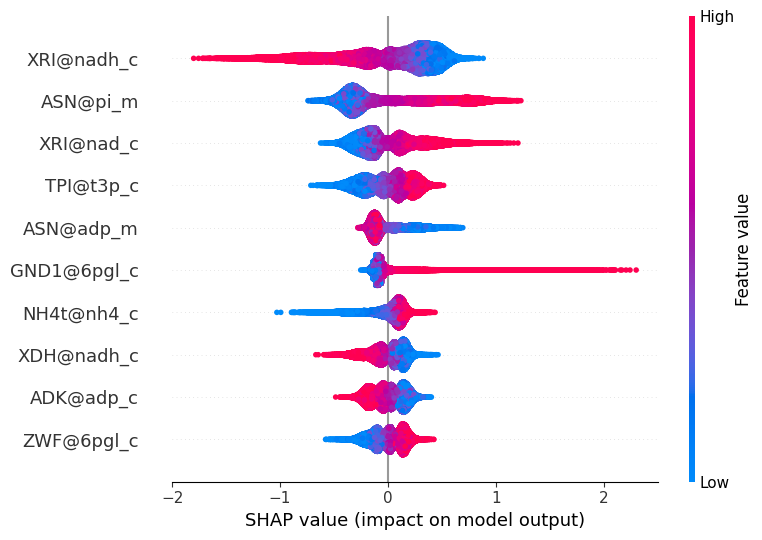

In [7]:
import shap

explainer = shap.TreeExplainer(m.model)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type='dot', max_display=10)

In [17]:
# import matplotlib.pyplot as plt
# from matplotlib import rcParams
# import tensorflow as tf

# model = tf.keras.Sequential([
#     tf.keras.layers.Dense(128, activation='relu'),
#     tf.keras.layers.Dense(256, activation='relu'),
#     tf.keras.layers.Dense(256, activation='relu'),
#     tf.keras.layers.Dense(1, activation='sigmoid')
# ])
# model.compile(
#     loss=tf.keras.losses.binary_crossentropy,
#     optimizer=tf.keras.optimizers.Adam(learning_rate=0.03),
#     metrics=[
#         tf.keras.metrics.BinaryAccuracy(name='accuracy'),
#         tf.keras.metrics.Precision(name='precision'),
#         tf.keras.metrics.Recall(name='recall')
#     ]
# )
# history = model.fit(X_train, y_train, epochs=100, batch_size=1028, validation_split=.3)

# # Plot learning curve
# plt.plot(history.history['accuracy'], label='accuracy')
# plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.show()
